# Etude du problème d'optimisation

**Question 1.1**  

La définition de l'énergie auto-consommée (3) est interprétable de la manière suivante :  

$E^{PV}$ représente l'énergie produite par les panneaux photovoltaïques et ($w_{i}$ + $P_{i}\Delta$t) la somme des consommations non-pilotables de la maison et de l'énergie dépensée pour chauffer l'eau du ballon. Donc pour chaque i (chaque intervalle de temps) nous pouvons prendre le minimum des deux variables car nous avons trois cas :  
- Si $w_{i}$ + $P_{i}\Delta$ t > $E^{PV}_{i}$
Alors la totalité de l'énergie photovoltaïque a été consommée, on la comptabilise entièrement pour l'intervalle "i" concerné.

- Si $w_{i}$ + $P_{i}\Delta$ t < $E^{PV}_{i}$
Alors nous n'avons pas consommé la totalité de l'énergie photovoltaïque produite et le surplus de production a été revendu. Donc nous pouvons comptabiliser le terme minimal ($w_{i}$ + $P_{i}\Delta$ t) qui est égal à la consommation d'énergie photovoltaïque.

- Si $w_{i}$ + $P_{i}\Delta$ t = $E^{PV}_{i}$  
Alors peu importe le terme que nous ajoutons à la somme.  
  
La fonction min{$E^{PV}_{i}$, $w_{i}$ + $P_{i}\Delta$ t} revient à chercher :  
$E^{PV}_{i}$ < $w_{i}$ + $P_{i}\Delta$ t <=> $E^{PV}_{i}$ - $w_{i}$ < $P_{i}\Delta$ t  
En posant donc $Ê_{i}$ = $E^{PV}_{i}$ - $w_{i}$  
On remarque que les fonctions min{$E^{PV}_{i}$, $w_{i} + $P_{i}\Delta$ t} et min{$Ê_{i}$, $P_{i}\Delta$ t} sont équivalentes.  

La difficulté que comporte ces deux coûts dans le cadre d'un problème d'optimisation est que ce sont des fonctions **discontinues**.




**Question 1.2**  

Supposons que $Ê_i < P_i \Delta t$ par symétrie (h est symétrique en $Ê_i$ et $P_i \Delta t$). 

On a donc $h(Ê_i, P_i \Delta t) = \frac{Ê_i + P_i \Delta te^{- \alpha (P_i\Delta t -Ê_i)}}{1+e^{- \alpha (P_i\Delta t-Ê_i)}}$.

Or $ \alpha (P_i \Delta t -Ê_i) >>1$ donc $e^{- \alpha (P_i\Delta t -Ê_i)} <<1$.

Par développement limité à l'ordre 0 exact de la fonction $\frac{1}{1+x}$ et $1+x$, on a donc: $h(Ê_i, P_i \Delta t) = (Ê_i +0)*(1+0) = Ê_i$. Par symétrie, on a donc qu'à l'ordre 0 :
$$ h(Ê_i, P_i \Delta t) = min(Ê_i, P_i \Delta t)$$

L'avantage de la fonction h est qu'elle est $C^1$ et explicite, donc beaucoup plus facile à manipuler que la fonction minimum.

**Question 1.3**  
  

$T_{i+1}$ = $e^{-k \Delta t} * T_{i} + \frac{1 - e^{-k \Delta t}}{k}$ C(-$Q_{i} + P_{i}$)

En développant le terme $e^{-k \Delta t}$ qui devient $1-k\Delta t$ au premier ordre, on obtient l'approximation suivante pour $T_{i+1}$ :  

  
$T_{i+1}$ ~ $(1-k\Delta t)$ * $T_{i}$ + $\Delta$ t * C(-$Q_{i} + P_{i}$)   
 
Le terme $(1-k\Delta t$) * $T_{i}$ se traduit par le fait que l'on perd légèrement en température si rien n'est fait au cours du temps.  
Le terme $\Delta$ t * C(-$Q_{i} + P_{i}$) représente le fait que l'on gagne ou l'on perd en température selon si l'on a plus de puissance soustraite que de puissance de chauffage ou inversement.  
  

On peut, par une analyse dimensionnelle, souligner le fait que la constante C est homogène à une résistance thermique.


**Question 1.4**

On veut maximiser (comme prouvé en 1.2) $\sum_{i=1}^{N} h(Ê_i, P_i \Delta t)$, donc minimiser $-\sum_{i=1}^{N} h(Ê_i, P_i \Delta t)$. Les seules variables sur lesquelles on a un contrôle sont la puissance $P$ et la température $T$, tous les autres facteurs (production, consommation etc) sont imposés. Donc il y a deux variables de décision (n=2), $P$ et $T$. On définit donc $f(P,T)=-\sum_{i=1}^{N} h(Ê_i, P_i \Delta t)$, qui est la fonction à minimiser. La contrainte égalité que l'on a est la relation entre température et puissance, on peut donc définir pour i entre 0 et N-1: $c_{E,i}(P)= T_{i+1} - T_i e^{-k \Delta t}- \frac {1-e^{-k \Delta t}}{k} C(-Q_i+P_i)$ . 

Les contraintes inégalités qu'on a sont $c_{I,i}(P) = T_i-T_{sat}$, $c'_{I,i}(P) = P_i-P_{M}$, $c''_{I,i}(P) = -T_{i}$, $c'''_{I,i}(P) = -P_{i}$ liées aux contraintes de sécurité.

## 2. Etude et résolution numérique du problème soft-min

**Question 2.6**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import casadi as cs

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      159
Number of nonzeros in inequality constraint Jacobian.:      212
Number of nonzeros in Lagrangian Hessian.............:       52

Total number of variables............................:      106
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       55
Total number of inequality constraints...............:      212
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      212

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -9.7194945e-03 7.56e+01 3.23e-03  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

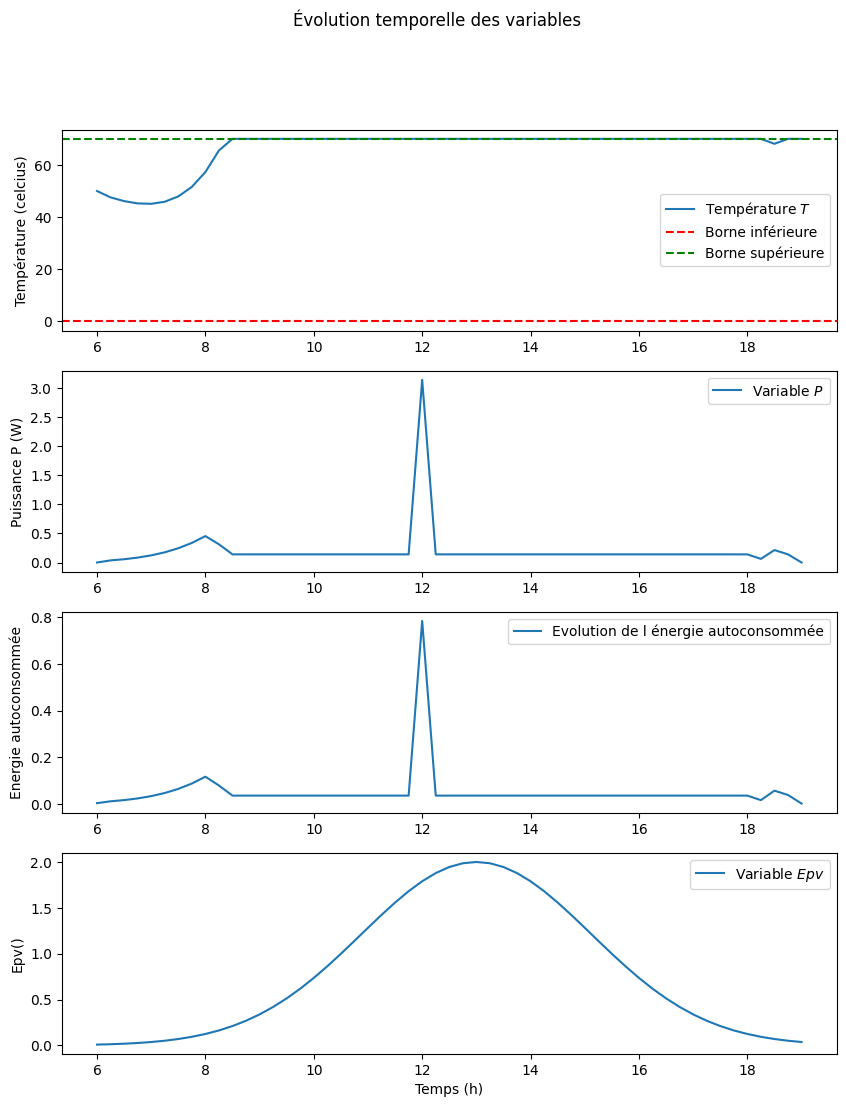

In [23]:
t0,tf=6,19
alpha=100
k=0.2
Tsat,Tin=70,50
Tf=Tsat
C=100
Pm=3000
pas=0.25
N=int((tf-t0)/pas)
nb_point=N+1
Q=np.zeros((N,1))
Q[24]=3
Epv=np.array([2*np.exp(-((t-13)**2)/9) for t in np.arange(t0,tf+pas,pas)])

def h(Ei, Pi_fois_pas):
    return((Ei*np.exp(-alpha*Ei)+Pi_fois_pas*np.exp(-alpha*Pi_fois_pas))/(np.exp(-alpha*Ei)+np.exp(-alpha*Pi_fois_pas)))

opti_cons = cs.Opti() #définition du problème d'optimisation
P = opti_cons.variable(nb_point) #variable de décision 
T = opti_cons.variable(nb_point) #variable de décision
opti_cons.subject_to(T[0] == Tin)
f = 0 #on définit ce qu'on voudra minimiser
for i in range(1,N+1):
    f += -h(Epv[i],P[i]*pas)

opti_cons.minimize(f) #fonction qui minimise f, en prenant en compte P et T

#contraintes 

for i in range(N): #d'égalité
    opti_cons.subject_to(T[i+1]==T[i]*np.exp(-k*pas)+((1-np.exp(-k*pas))/k)*C*(-Q[i]+P[i]))

for i in range (N+1): #d'inégalité
    opti_cons.subject_to(P[i]-Pm<=0)
    opti_cons.subject_to(-P[i]<=0)
    opti_cons.subject_to(T[i]-Tsat<=0)
    opti_cons.subject_to(-T[i]<=0)

opti_cons.subject_to(T[N] == Tf) #contrainte finale

opti_cons.set_initial(T,Tin) #conditions initiales
opti_cons.subject_to(P[N] == 0) #contrainte finale

opti_cons.solver('ipopt') #méthode de résolution "ipopt"
sol = opti_cons.solve() #je demande à calculer la solution

#récupération des valeurs
T_values = sol.value(T) 
P_values = sol.value(P)

f_val_per_time=np.array([h(Epv[i],P_values[i]*pas) for i in range(N+1)])

# Créer un tableau de temps

temps = np.arange(t0, tf+pas, pas)

# Créer une figure et des sous-graphiques
fig, axs = plt.subplots(4, 1, figsize=(10, 12))

# Tracer l'évolution temporelle de T
axs[0].plot(temps, T_values, label='Température $T$')
axs[0].axhline(0, color='r', linestyle='--', label='Borne inférieure')
axs[0].axhline(Tsat, color='g', linestyle='--', label='Borne supérieure')
axs[0].set_ylabel('Température (celcius)')
axs[0].legend()

# Tracer l'évolution temporelle de P
axs[1].plot(temps, P_values, label='Variable $P$')
axs[1].set_ylabel('Puissance P (W)')
axs[1].legend()

# Tracer l'évolution temporelle de f
axs[2].plot(temps,  f_val_per_time, label='Evolution de l énergie autoconsommée')
axs[2].set_ylabel('Energie autoconsommée')
axs[2].legend()

# Tracer l'évolution temporelle de Epv
axs[3].plot(temps, Epv, label='Variable $Epv$')
axs[3].set_ylabel('Epv()')
axs[3].set_xlabel('Temps (h)')
axs[3].legend()

# Titre global
plt.suptitle('Évolution temporelle des variables')

# Afficher les graphiques
plt.show()

## 3 Etude et résolution numérique du problème avec variable slack

**Question 3.7**

Comme avant, on veut minimiser $f(P,T,s)=-\sum_{i=1}^{N} h(Ê_i, P_i \Delta t)$. Les variables de décision $P$ et $T$ sont toujours là, et on rajoute la variable $s$, de dimension N+1. On définit donc $f(P,T)=-\sum_{i=1}^{N} h(Ê_i, P_i \Delta t)$, qui est la fonction à minimiser. 

Comme avant, la contrainte égalité que l'on a est la relation entre température et puissance, on peut donc définir pour i entre 0 et N-1: $c_{E,i}(P)= T_{i+1} - T_i e^{-k \Delta t}- \frac {1-e^{-k \Delta t}}{k} C(-Q_i+P_i)$ . 

Les contraintes inégalités qu'on a sont $c_{I,i}(P) = T_i-T_{sat}$, $c'_{I,i}(P) = P_i-P_{M}$, $c''_{I,i}(P) = -T_{i}$, $c'''_{I,i}(P) = -P_{i}$ liées aux contraintes de sécurité.

On a d'autres contraintes inégalité, qui sont:
$C_{s,i}=s_i-P_i$,   $C'_{s,i}=s_i-Ê_i$ pour i entre 0 et N

**Question 3.9**


This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      159
Number of nonzeros in inequality constraint Jacobian.:      371
Number of nonzeros in Lagrangian Hessian.............:       52

Total number of variables............................:      159
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       55
Total number of inequality constraints...............:      318
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      318

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -9.7194945e-03 7.56e+01 6.67e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

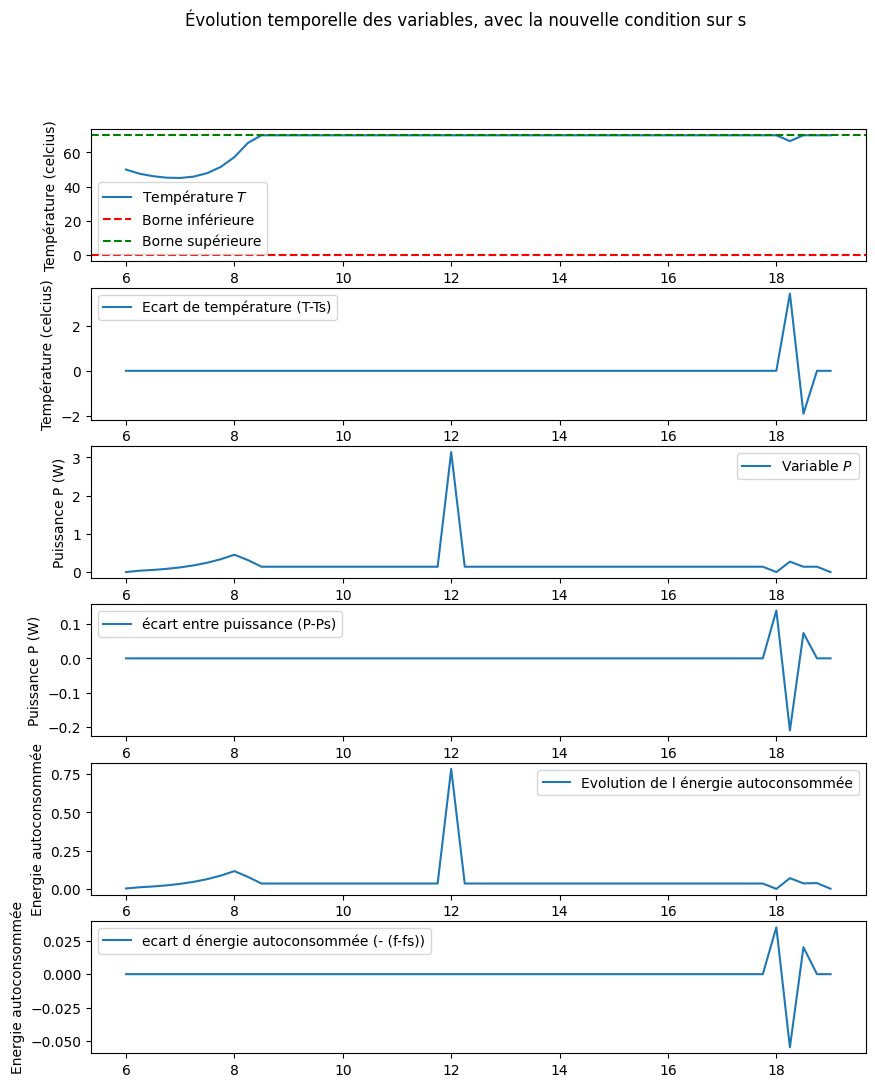

In [24]:
opti_cons_s = cs.Opti() #définition du problème d'optimisation
P = opti_cons_s.variable(nb_point) #variable de décision 
T = opti_cons_s.variable(nb_point) #variable de décision
s=opti_cons_s.variable(nb_point) #variable de décision supplémentaire
opti_cons_s.subject_to(T[0] == Tin)
f = 0 #on définit ce qu'on voudra minimiser
for i in range(1,N+1):
    f += -h(Epv[i],P[i]*pas)

opti_cons_s.minimize(f) #fonction qui minimise f, en prenant en compte P et T

#contraintes 

for i in range(N): #d'égalité
    opti_cons_s.subject_to(T[i+1]==T[i]*np.exp(-k*pas)+((1-np.exp(-k*pas))/k)*C*(-Q[i]+P[i]))

for i in range (N+1): #d'inégalité
    opti_cons_s.subject_to(P[i]-Pm<=0)
    opti_cons_s.subject_to(-P[i]<=0)
    opti_cons_s.subject_to(T[i]-Tsat<=0)
    opti_cons_s.subject_to(-T[i]<=0)
    opti_cons_s.subject_to(s[i]-P[i]<=0) #contrainte supplémentaire
    opti_cons_s.subject_to(s[i]- Epv[i]<=0) #contrainte supplémentaire

opti_cons_s.subject_to(T[N] == Tf) #contrainte finale

opti_cons_s.set_initial(T,Tin) #conditions initiales
opti_cons_s.subject_to(P[N] == 0) #contrainte finale

opti_cons_s.solver('ipopt') #méthode de résolution "ipopt"
sol_s = opti_cons_s.solve() #je demande à calculer la solution

#récupération des valeurs
Ts_values = sol_s.value(T) 

Ps_values = sol_s.value(P)

f_val_per_time_s=np.array([h(Epv[i],Ps_values[i]*pas) for i in range(N+1)])

# Créer un tableau de temps
#temps = np.arange(t0, tf+pas, pas)

temps = np.arange(t0, tf+pas, pas)

# Créer une figure et des sous-graphiques
fig, axs = plt.subplots(6, 1, figsize=(10, 12))

# Tracer l'évolution temporelle de T
axs[0].plot(temps, Ts_values, label='Température $T$')
axs[0].axhline(0, color='r', linestyle='--', label='Borne inférieure')
axs[0].axhline(Tsat, color='g', linestyle='--', label='Borne supérieure')
axs[0].set_ylabel('Température (celcius)')
axs[0].legend()

axs[1].plot(temps, T_values-Ts_values, label='Ecart de température (T-Ts)')
axs[1].set_ylabel('Température (celcius)')
axs[1].legend()

# Tracer l'évolution temporelle de P
axs[2].plot(temps, Ps_values, label='Variable $P$')
axs[2].set_ylabel('Puissance P (W)')
axs[2].legend()

axs[3].plot(temps, P_values-Ps_values, label='écart entre puissance (P-Ps)')
axs[3].set_ylabel('Puissance P (W)')
axs[3].legend()
# Tracer l'évolution temporelle de f
axs[4].plot(temps, f_val_per_time_s, label='Evolution de l énergie autoconsommée')
axs[4].set_ylabel('Energie autoconsommée')
axs[4].legend()

axs[5].plot(temps,  f_val_per_time - f_val_per_time_s, label='ecart d énergie autoconsommée (- (f-fs))')
axs[5].set_ylabel('Energie autoconsommée')
axs[5].legend()

# Titre global
plt.suptitle('Évolution temporelle des variables, avec la nouvelle condition sur s')

# Afficher les graphiques
plt.show()

On remarque que la solution n'est pas la même, et notamment que l'énergie autoconsommée est plus faible dans ce nouveau modèle. Ceci est logique, en effet on a rajouté des contraintes donc la solution est nécessairement moins optimisée.

## 4 Pilotage d’usages blancs et introduction à l’optimisation entière

**Question 4.10**

Le problème est le même qu'avant, à l'exception cette fois que la puissance électrique de la machine à laver s'ajoute aux puissance consommées. On suppose dans cette question que cette puissance se déclenche à un temps  $t_{i0}$  fixe, elle n'est pas encore pilotable.

Comme avant, on veut minimiser $f(P,T)=-\sum_{i=1}^{N} h(Ê_i, (P_i+P^L_i) \Delta t)$. Les variables de décision $P$ et $T$ sont toujours là.

La contrainte égalité est modifiée, on peut donc définir pour i entre 0 et N-1: $c_{E,i}(P)= T_{i+1} - T_i e^{-k \Delta t}- \frac {1-e^{-k \Delta t}}{k} C(-Q_i+P_i)$ . 

Les contraintes inégalités qu'on a sont $c_{I,i}(P) = T_i-T_{sat}$, $c'_{I,i}(P) = P_i-P_{M}$, $c''_{I,i}(P) = -T_{i}$, $c'''_{I,i}(P) = -P_{i}$ liées aux contraintes de sécurité.


**Question 4.11**

On sait que le problème pour une machine à laver lancée à $t_{i0}$ correspond à celui de la question d'avant. On peut donc calculer la puissance auto consommée dans chaque cas pour  $t_{i0}$ entre $t_0$ et $t_f - n_L \Delta t$, et la valeure maximale qu'on trouvera nous donnera à quel instant il faut lancer la machine.

In [29]:
P_mach=0.25
nL=6

def energie_autoconso(j):
    P_L=np.zeros((N+1,1))
    for k in range (j, j+nL):
        P_L[k]=P_mach

    new_opti_cons = cs.Opti() #définition du problème d'optimisation
    P = new_opti_cons.variable(nb_point) #variable de décision 
    T = new_opti_cons.variable(nb_point) #variable de décision
    new_opti_cons.subject_to(T[0] == Tin)
    f = 0 #on définit ce qu'on voudra minimiser
    for i in range(1,N+1):
        f += -h(Epv[i],(P[i]+P_L[i])*pas)

    new_opti_cons.minimize(f) #fonction qui minimise f, en prenant en compte P et T

    #contraintes 

    for i in range(N): #d'égalité
        new_opti_cons.subject_to(T[i+1]==T[i]*np.exp(-k*pas)+((1-np.exp(-k*pas))/k)*C*(-Q[i]+P[i]))

    for i in range (N+1): #d'inégalité
        new_opti_cons.subject_to(P[i]-Pm<=0)
        new_opti_cons.subject_to(-P[i]<=0)
        new_opti_cons.subject_to(T[i]-Tsat<=0)
        new_opti_cons.subject_to(-T[i]<=0)

    new_opti_cons.subject_to(T[N] == Tf) #contrainte finale

    new_opti_cons.set_initial(T,Tin) #conditions initiales
    new_opti_cons.subject_to(P[N] == 0) #contrainte finale

    new_opti_cons.solver('ipopt') #méthode de résolution "ipopt"
    new_sol = new_opti_cons.solve() #je demande à calculer la solution

    #récupération des valeurs
    energie_autoconso = new_sol.value(f)
    return(energie_autoconso)

energie=[]

for j in range (N-nL+1):
    energie.append(energie_autoconso(j))

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      159
Number of nonzeros in inequality constraint Jacobian.:      212
Number of nonzeros in Lagrangian Hessian.............:       52

Total number of variables............................:      106
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       55
Total number of inequality constraints...............:      212
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      212

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.5217576e-01 7.85e+01 4.18e-03  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

In [30]:
print("Energie autoconsommée maximale : ", -min(energie), 'pour une machine lancée à partir de ', t0+pas*np.argmin(energie), 'h')

Energie autoconsommée maximale :  42.45706956362238 pour une machine lancée à partir de  9.25 h


Si on note n le nombre d'instant où on peut lancer un usage pilotable (pour la machine à laver, n=N-nL+1), et k le nombre d'usages pilotables, la méthode utilisée juste avant a une complexité en $n^k$. Ainsi, il devient trop long (voire impossible) d'appliquer la même méthode de résolution dans le cas où l'on a de nombreux usages pilotables.